# POSIX Evaluation on Baseline versus CoT based responses from Falcon LLM on the ALPACA dataset

### Dataset Preparation

In [ ]:
import pandas as pd
import glob

#Baseline
# Find all matching files
files = sorted(glob.glob("posix_scores/posix_prompt_response_scores_*.csv"))
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# Save to a single combined file
df.to_csv("all_posix_scores_combined.csv", index=False)

print(f"Merged {len(files)} files into all_posix_scores_combined.csv")

Merged 46 files into all_posix_scores_combined.csv


In [ ]:
#CoT

# Find all matching files
files = sorted(glob.glob("cot_posix/posix_prompt_response_scores_cot*.csv"))
df_cot = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# Save to a single combined file
df_cot.to_csv("all_posix_scores_combined_cot.csv", index=False)

print(f"Merged {len(files)} files into all_posix_scores_combined_cot.csv")

Merged 46 files into all_posix_scores_combined_cot.csv


In [97]:
print(f"Sanity check: {len(df_cot)},{len(df)}")

Sanity check: 96600,96600


In [ ]:
import random
set_ids = df['set_id'].unique()
idx = [random.randint(0, len(set_ids)-1) for _ in range(2)]
df_idx = df[df['set_id'].isin(set_ids[idx])]
df_cot_idx = df_cot[df_cot['set_id'].isin(set_ids[idx])]
# Display the results - response from baseline and cot
print("===============================================")
for i in range(10):
   
    print(f"Prompt:{df_idx.iloc[i]['original_prompt']}")
    print("Baseline Response:")
    print(df_idx.iloc[i]['response'])
    print("Cot Response:")
    print(df_cot_idx.iloc[i]['response'])
    print("===============================================")


Prompt:Q:generate a list of ten interesting things about a cat
A:
Baseline Response:
1. Cats are very clean animals. 2. Cats are very clean animals. 3. Cats are very clean animals. 4.
Cot Response:
1. The cat is a mammal. 2. Cats are carnivores. 3. Cats are warm-blooded. 4. Cats
Prompt:Q:egnerate a list of ten interesting things about a cat
A:
Baseline Response:
1. Cats are very clean animals. 2. Cats are very clean animals. 3. Cats are very clean animals. 4.
Cot Response:
1. A cat is a mammal. 2. Cats are mammals. 3. Cats are mammals. 4. Cats are mammals.
Prompt:Q:generate a lisit okf tean interestinog thingd about a czat
A:
Baseline Response:
Q: A: Q: A: Q: A: Q: A: Q: A:
Cot Response:
1. What is the interest rate? 2. What is the time period? 3. What is the amount? 4. What
Prompt:Q:generate a list of ten interesting things about a ct
A:
Baseline Response:
1. The first thing I noticed about the ct was that it was a ct. 2. The second thing I noticed about the
Cot Response:
1. The first

In [75]:

print("===============================================")
idx = random.randint(0,len(df_idx))
for i in range(idx,idx+10):
   
    print(f"Prompt:{df_idx.iloc[i]['original_prompt']}")
    print("Baseline Response:")
    print(df_idx.iloc[i]['response'])
    print("Cot Response:")
    print(df_cot_idx.iloc[i]['response'])
    print("===============================================")


Prompt:q:Describe a tennis match.
a:
Baseline Response:
q:What is the difference between a tennis match and a tennis tournament? a: q:What is the difference between a tennis match
Cot Response:
1. The ball is hit by the player. 2. The ball is hit by the opponent. 3. The ball is hit by
Prompt:Q: Describe a tennis match.
Answer:
Baseline Response:
A tennis match is a competition between two or more players. The players are called players. The players are called players. The players are
Cot Response:
1. The ball is hit. 2. The ball is hit. 3. The ball is hit. 4. The ball is
Prompt:Q: Describe a tennis match. || A:
Baseline Response:
tennis match is a game in which two players compete against each other. || Q: What is the most important part of a tennis match? ||
Cot Response:
Q: What is the first step in a tennis match? || A: The first step is to get ready. Q: What is the
Prompt:QUESTION:Describe a tennis match.
A:
Baseline Response:
tennis match is a competition between two or more playe

### Comparisons: Baseline versus CoT

In [ ]:
df_base = pd.read_csv("all_posix_scores_combined.csv")
df_cot = pd.read_csv("all_posix_scores_combined_cot.csv")

# One score per set (same set_id repeated for each prompt)
posix_base = df_base.groupby("set_id").first()["posix_score"]
posix_cot = df_cot.groupby("set_id").first()["posix_score"]

# Combine into one DataFrame
comparison = pd.DataFrame({
    "POSIX_Baseline": posix_base,
    "POSIX_CoT": posix_cot
})
comparison["Delta"] = comparison["POSIX_CoT"] - comparison["POSIX_Baseline"]

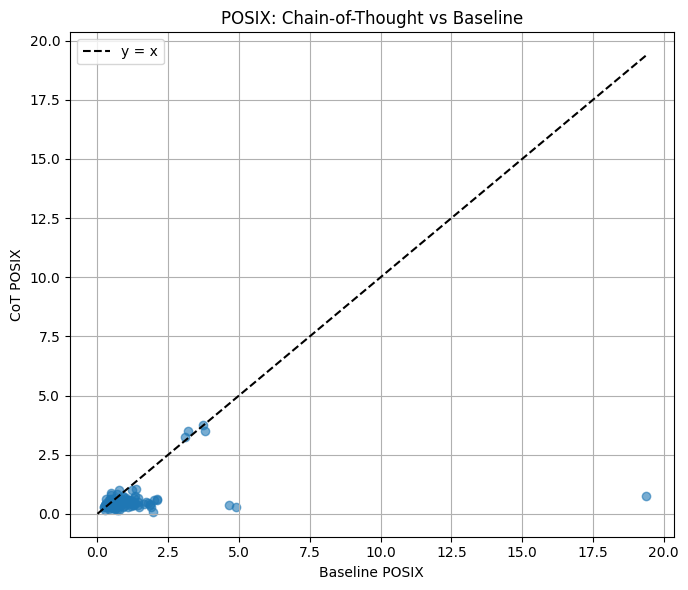

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(comparison["POSIX_Baseline"], comparison["POSIX_CoT"], alpha=0.6)
plt.plot([0, comparison.max().max()], [0, comparison.max().max()], 'k--', label="y = x")
plt.xlabel("Baseline POSIX")
plt.ylabel("CoT POSIX")
plt.title("POSIX: Chain-of-Thought vs Baseline")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


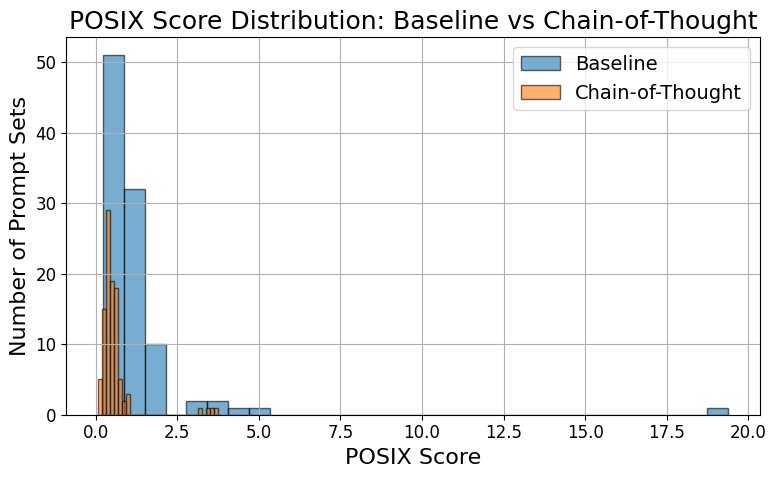

In [ ]:
plt.figure(figsize=(8, 5))

# Set global font size
plt.rcParams.update({'font.size': 14})

plt.hist(comparison["POSIX_Baseline"], bins=30, alpha=0.6, label="Baseline", edgecolor='black')
plt.hist(comparison["POSIX_CoT"], bins=30, alpha=0.6, label="Chain-of-Thought", edgecolor='black')

plt.xlabel("POSIX Score", fontsize=16)
plt.ylabel("Number of Prompt Sets", fontsize=16)
plt.title("POSIX Score Distribution: Baseline vs Chain-of-Thought", fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("posix_delta_hist_cot_vs_baseline.svg", format='svg')
plt.show()


In [21]:
print("Average POSIX (Baseline):", posix_base.mean())
print("Average POSIX (CoT):", posix_cot.mean())
print("Average POSIX Change (CoT - Baseline):", comparison["Delta"].mean())


Average POSIX (Baseline): 1.2484495064647532
Average POSIX (CoT): 0.5876994145590683
Average POSIX Change (CoT - Baseline): -0.6607500919056849


In [93]:
top_sensitive = posix_by_set.sort_values(ascending=False).head(5)
least_sensitive = posix_by_set.sort_values().head(5)

print("Most sensitive prompt sets (high POSIX):")
print(top_sensitive)
for idx in range(10):
    print(df.loc[df["set_id"].isin(top_sensitive.index),:].iloc[idx]['original_prompt'])
    print(f"Baseline: {df.loc[df['set_id'].isin(top_sensitive.index), :].iloc[idx]['response']}")
    print(f"POSIX: {df.loc[df['set_id'].isin(top_sensitive.index), :].iloc[idx]['posix_score']}")

    print(f"CoT: {df_cot.loc[df_cot['set_id'].isin(top_sensitive.index), :].iloc[idx]['response']}")
    print(f"POSIX: {df_cot.loc[df_cot['set_id'].isin(top_sensitive.index), :].iloc[idx]['posix_score']}")
    print("===============================================")



Most sensitive prompt sets (high POSIX):
set_id
2     19.385470
25     4.876701
19     4.655032
17     3.801017
62     3.729117
Name: posix_score, dtype: float64
Q:Create a new dish with the hashtag "#mixbuffet".
A:
Baseline: Q:What is the name of the dish? A: Q:What is the name of the dish? A: Q
POSIX: 19.38547023641764
CoT: Step 1: Step 2: Step 3: Step 4: Step 5: Step 6: Step 7: Step
POSIX: 0.7468785967669898
Q:Create q new dihs sith the hashtga `` # mixubffet '' .
A:
Baseline: Q: A: Q: A: Q: A: Q: A: Q: A:
POSIX: 19.38547023641764
CoT: 1. Create a new file with the name "mixubffet.py". 2. In the file, write the following code:
POSIX: 0.7468785967669898
Q:Create a nerw dish wih the hashtag `` # mixbuffet '' .
A:
Baseline: Q:What is the best way to make a dish with a lot of vegetables? A: Q:What is the best way to
POSIX: 19.38547023641764
CoT: Step 1: Step 2: Step 3: Step 4: Step 5: Step 6: Step 7: Step
POSIX: 0.7468785967669898
Q:Create a nw diswh wiht the hashtag `` # mibxuffet '' .

In [95]:

print("\nLeast sensitive prompt sets (low POSIX):")
print(least_sensitive)

for idx in range(10):
    print(df.loc[df["set_id"].isin(least_sensitive.index),:].iloc[idx]['original_prompt'])
    print(f"Baseline: {df.loc[df['set_id'].isin(least_sensitive.index), :].iloc[idx]['response']}")
    print(f"POSIX: {df.loc[df['set_id'].isin(least_sensitive.index), :].iloc[idx]['posix_score']}")

    print(f"CoT: {df_cot.loc[df_cot['set_id'].isin(least_sensitive.index), :].iloc[idx]['response']}")
    print(f"POSIX: {df_cot.loc[df_cot['set_id'].isin(least_sensitive.index), :].iloc[idx]['posix_score']}")
    print("===============================================")




Least sensitive prompt sets (low POSIX):
set_id
64    0.228328
75    0.239383
52    0.264276
70    0.266950
16    0.276598
Name: posix_score, dtype: float64
Q:Suggest three tips for preparing for a job interview.
A:
Baseline: 1. Prepare a list of questions to ask the interviewer. 2. Prepare a list of questions to ask the interviewer. 3. Prepare
POSIX: 0.2765982605237165
CoT: 1. Prepare a list of questions to ask the interviewer. 2. Prepare a list of questions to ask the interviewer. 3. Prepare
POSIX: 0.177090580378341
Q:Sugest three tips fwor preparimg for a job intwrview .
A:
Baseline: 1. Be prepared. 2. Be yourself. 3. Be confident. Q:What is the best way to prepare for a
POSIX: 0.2765982605237165
CoT: 1. Prepare a list of questions to ask the interviewer. 2. Prepare a list of questions to ask the interviewer. 3. Prepare
POSIX: 0.177090580378341
Q:Suggest three tips for preparing for a jb interview .
A:
Baseline: 1. Prepare a list of questions to ask the interviewer. 2. Prepare a li